# Clustering with Hypertools

The cluster feature performs clustering analysis on the data (an arrray, dataframe, or list) and returns a list of cluster labels. 

The default clustering method is K-Means (argument 'KMeans') with MiniBatchKMeans, AgglomerativeClustering, Birch, FeatureAgglomeration, and SpectralClustering also supported.

Note that, if a list is passed, the arrays will be stacked and clustering will be performed *across* all lists (not within each list).

## Import Packages

In [1]:
import hypertools as hyp
from collections import Counter

%matplotlib inline

## Load your data

We will load one of the sample datasets. This dataset consists of 8,124 samples of mushrooms with various text features.

In [2]:
mushrooms = hyp.load('mushrooms')

We can peek at the first few rows of the dataframe using the pandas function `head()`

In [3]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Obtain cluster labels

To obtain cluster labels, simply pass the data to `hyp.cluster`.  Since we have not specified a desired number of cluster, the default of 3 clusters is used (labels 0, 1, and 2). Additionally, since we have note specified a desired clustering algorithm, K-Means is used by default.

In [4]:
labels = hyp.cluster(mushrooms)
set(labels)

{0, 1, 2}

We can further examine the number of datapoints assigned each label.

In [5]:
Counter(labels)

Counter({0: 5024, 1: 1768, 2: 1332})

## Specify number of cluster labels

You can also specify the number of desired clusters by setting the `n_clusters` argument to an integer number of clusters, as below. We can see that when we pass the int 10 to n_clusters, 10 cluster labels are assigned. 

Since we have note specified a desired clustering algorithm, K-Means is used by default.

In [6]:
labels_10 = hyp.cluster(mushrooms, n_clusters = 10)
set(labels_10)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Different clustering models

You may prefer to use a clustering model other than K-Means. To do so, simply pass a string to the cluster argument specifying the desired clustering algorithm.

In this case, we specify both the clustering model (Birch) and the number of clusters (10).

In [7]:
labels_birch = hyp.cluster(mushrooms, cluster = 'Birch', n_clusters=10)

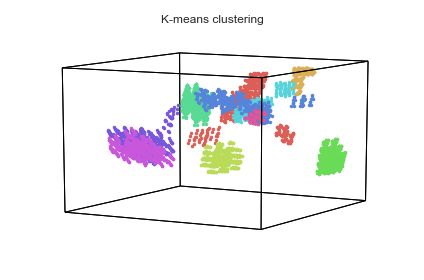

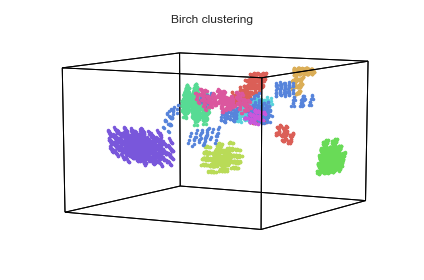

In [8]:
geo  = hyp.plot(mushrooms, '.', group=labels_10, title='K-means clustering')
geo  = hyp.plot(mushrooms, '.', group=labels_birch, title='Birch clustering')